In [2]:
from matplotlib import pyplot as plt, patches, gridspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

## Maps of region of interest

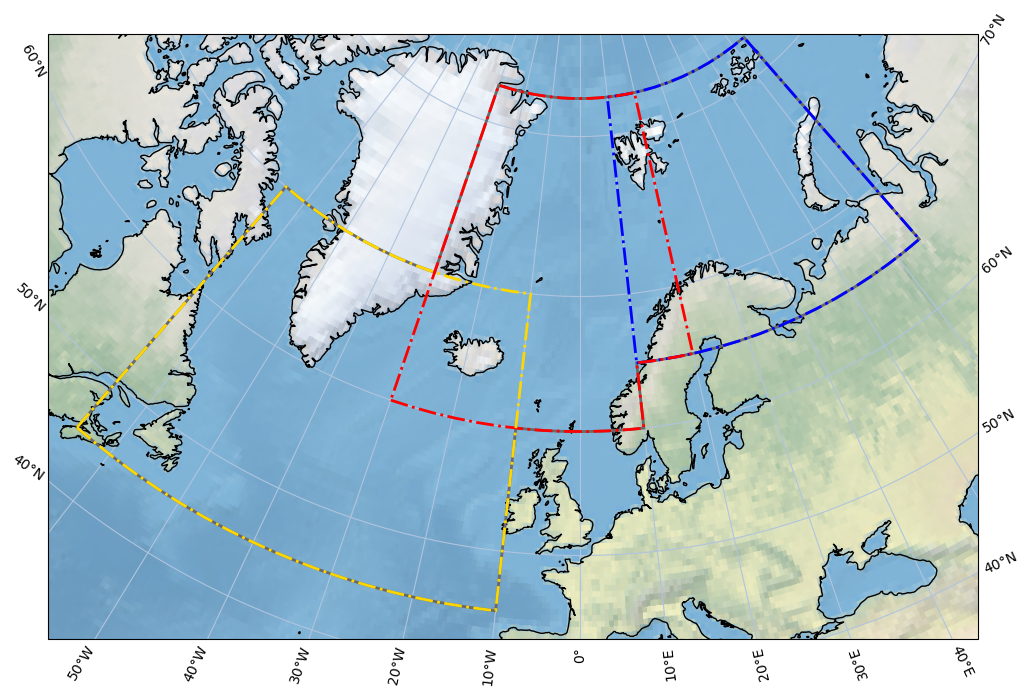

In [33]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-67,48,43,82], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

aoi_corners = [[-65,45],[-10,45],[-10,60],[10,60],[10,65],[65,65],[65,82],[-30,82], [-30,70],[-65,70],[-65,45]]
aoi = patches.Polygon(xy=aoi_corners, edgecolor='dimgrey', facecolor='none', linewidth=2, transform=ccrs.PlateCarree(), zorder=2)
ax.add_patch(aoi)

gin_corners = [[-30,60],[10,60],[10,65],[20,65],[20,82],[-30,82],[-30,60]]
barents_corners = [[10,65],[65,65],[65,82],[10,82],[10,65]]
labrador_corners = [[-65,45],[-10,45],[-10,70],[-65,70],[-65,45]]

# Barents Sea subregion
barents_box = patches.Polygon(xy=barents_corners, edgecolor='blue', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=3)
ax.add_patch(barents_box)

# Greenland-Iceland-Norwegian Seas subregion
gin_box = patches.Polygon(xy=gin_corners, edgecolor='red', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=4)
ax.add_patch(gin_box)

# Labrador Sea subregion
labrador_box = patches.Polygon(xy=labrador_corners, edgecolor='gold', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(labrador_box)

bb1_corners = [[-65,45],[-10,45],[-10,70],[-65,70],[-65,45]] # Labrador Sea
bb2_corners = [[-30,60],[10,60],[10,82],[-30,82],[-30,60]] # Most of GIN Seas
bb3_corners = [[10,65],[65,65],[65,82],[10,82],[10,65]] # Barents Sea



bb1 = patches.Polygon(xy=bb1_corners, edgecolor='purple', fc='none', lw=2, ls=':', transform=ccrs.PlateCarree(), zorder=6)
#ax.add_patch(bb1)

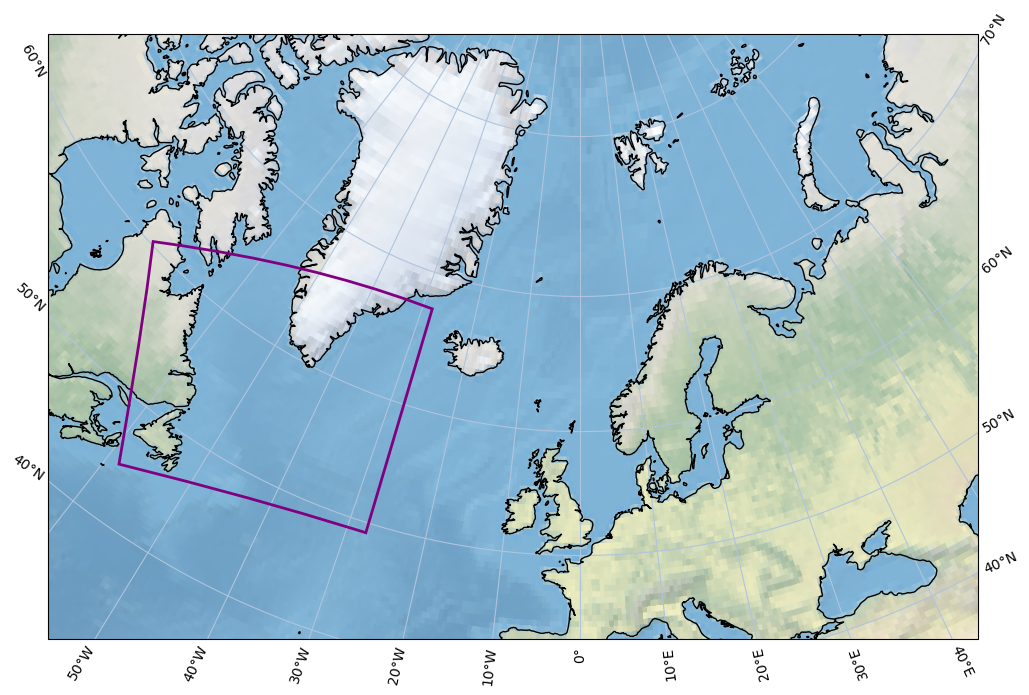

In [17]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-67,48,43,82], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

# Example polygon from MODIS granule info
polygon = '67.495375 -28.18303 60.232009 -75.100066 44.820723 -58.396863 49.181452 -27.550534 67.495375 -28.18303'
polygon = polygon.split()
polygon = [float(x) for x in polygon]
polygon = [(polygon[i+1], polygon[i]) for i in range(0, len(polygon), 2)] # need to swap lat/lon

polygon_patch = patches.Polygon(xy=polygon, edgecolor='purple', facecolor='none', 
                                linewidth=2, transform=ccrs.Geodetic(), zorder=2) # ? Projection
ax.add_patch(polygon_patch)


In [19]:
# Poltgons for one day's worth of MODIS granules

polygons = ['62.701894 20.645219 56.888587 62.600547 69.265475 93.384348 80.776895 11.079099 62.701894 20.645219',
 '80.360472 13.960098 68.877821 93.702143 69.173032 146.386309 80.538654 -131.883933 80.360472 13.960098',
 '48.878056 44.912723 44.689877 75.786627 60.39481 91.583795 67.160205 44.255483 48.878056 44.912723',
 '66.670594 45.105119 60.081395 92.158707 70.638846 129.299635 84.446975 23.933265 66.670594 45.105119',
 '70.629357 69.209243 63.052294 122.718943 71.241588 166.356611 87.109212 5.837132 70.629357 69.209243',
 '82.953286 -30.803906 69.667017 -120.370827 58.5815 -85.811147 64.846505 -41.415666 82.953286 -30.803906',
 '65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '47.355108 -41.852758 42.828844 -71.218032 25.718668 -63.00483 29.083026 -39.478961 47.355108 -41.852758',
 '82.360542 134.037909 69.691682 -137.153556 68.175887 -84.851073 78.534922 -11.049649 82.360542 134.037909',
 '79.104455 -12.534496 67.955178 -85.420141 55.260693 -56.756706 60.869197 -16.939512 79.104455 -12.534496',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '85.958534 141.383497 70.700537 -100.775945 65.861032 -51.526599 74.631123 10.661454 85.958534 141.383497',
 '75.16902 9.384176 65.686757 -52.092449 51.793034 -28.40744 56.884423 7.721013 75.16902 9.384176',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137',
 '87.504548 95.748376 70.884696 -63.68196 63.126086 -19.773788 70.690339 33.838127 87.504548 95.748376',
 '71.200152 32.737289 63.00593 -20.27802 48.221316 -0.606186 52.89511 32.532465 71.200152 32.737289',
 '76.642128 -144.800447 66.970526 -77.528117 70.539492 -26.415667 84.067419 76.168335 76.642128 -144.800447',
 '84.703021 74.930926 70.252433 -26.868292 60.108785 10.712591 66.732837 57.742337 84.703021 74.930926',
 '67.217374 56.778663 60.019309 10.248747 44.567812 26.753399 48.904819 57.451957 67.217374 56.778663',
 '62.88106 -116.872383 57.052669 -74.749613 69.366666 -43.681344 80.954314 -126.75535 62.88106 -116.872383',
 '80.536614 -123.837129 68.953462 -43.335731 69.089863 9.333161 80.364601 90.347367 80.536614 -123.837129',
 '80.955878 88.762819 68.849922 8.783879 56.866465 40.156011 62.766843 82.05756 80.955878 88.762819',
 '31.140434 -94.539428 27.863139 -70.366605 44.991173 -62.15453 49.419858 -92.934739 31.140434 -94.539428',
 '48.966072 -92.582042 44.766845 -61.658431 60.45725 -45.798499 67.245031 -93.251749 48.966072 -92.582042',
 '66.757152 -92.412162 60.145466 -45.225678 70.676966 -7.684028 84.59624 -114.521304 66.757152 -92.412162',
 '84.299605 -108.698346 70.307104 -7.608677 67.022813 43.434775 76.504595 110.767224 84.299605 -108.698346',
 '77.060172 109.375859 66.836147 42.872411 53.471342 68.818501 58.795599 106.621163 77.060172 109.375859',
 '35.117304 -69.30049 31.703173 -44.062653 48.630532 -34.753951 53.406038 -68.012238 35.117304 -69.30049',
 '52.939504 -67.581377 48.388003 -34.227723 63.447313 -15.201364 71.198576 -69.392148 52.939504 -67.581377',
 '70.713711 -68.317957 63.113297 -14.651628 71.24874 29.395105 87.14952 -135.027891 70.713711 -68.317957',
 '87.333054 -122.159416 70.899687 29.229974 64.481556 75.908384 72.584938 133.356571 87.333054 -122.159416',
 '39.099361 -44.102462 35.514774 -17.580604 52.189137 -6.901332 57.395081 -43.201244 39.099361 -44.102462',
 '56.920036 -42.705776 51.933837 -6.369932 66.14145 16.702117 75.127803 -46.375693 56.920036 -42.705776',
 '74.671694 -44.641119 65.77708 17.211313 70.967719 66.674768 85.703731 -173.838228 74.671694 -44.641119',
 '43.084922 -18.954875 39.288576 9.112224 55.639797 21.519255 61.378828 -18.551962 43.084922 -18.954875',
 '60.893238 -17.942043 55.35838 22.087004 68.393521 50.22484 79.026847 -24.95218 60.893238 -17.942043',
 '78.590278 -22.601807 68.028329 50.588635 69.874263 103.121263 82.179975 -167.097614 78.590278 -22.601807',
 '47.066079 6.14558 43.011963 36.052906 58.946983 50.656758 65.353747 5.883726 47.066079 6.14558',
 '64.864765 6.634052 58.643159 51.234445 70.090214 85.402722 82.81669 -7.702864 64.864765 6.634052',
 '82.442352 -3.691023 69.725691 85.580978 68.087247 138.06121 78.360295 -148.694786 82.442352 -3.691023']

In [31]:
# Daylight only (1st January 2022)

polygons = ['65.32226 -42.39235 58.514522 -86.250366 42.804302 -71.002899 47.005119 -41.373433 65.32226 -42.39235',
 '47.355108 -41.852758 42.828844 -71.218032 25.718668 -63.00483 29.083026 -39.478961 47.355108 -41.852758',
 '61.318066 -17.746412 55.218148 -57.135056 39.057687 -44.117497 43.005353 -16.280522 61.318066 -17.746412',
 '57.306491 7.002137 51.77438 -28.732424 35.261994 -17.484584 39.000952 8.815947 57.306491 7.002137',
 '67.217374 56.778663 60.019309 10.248747 44.567812 26.753399 48.904819 57.451957 67.217374 56.778663']

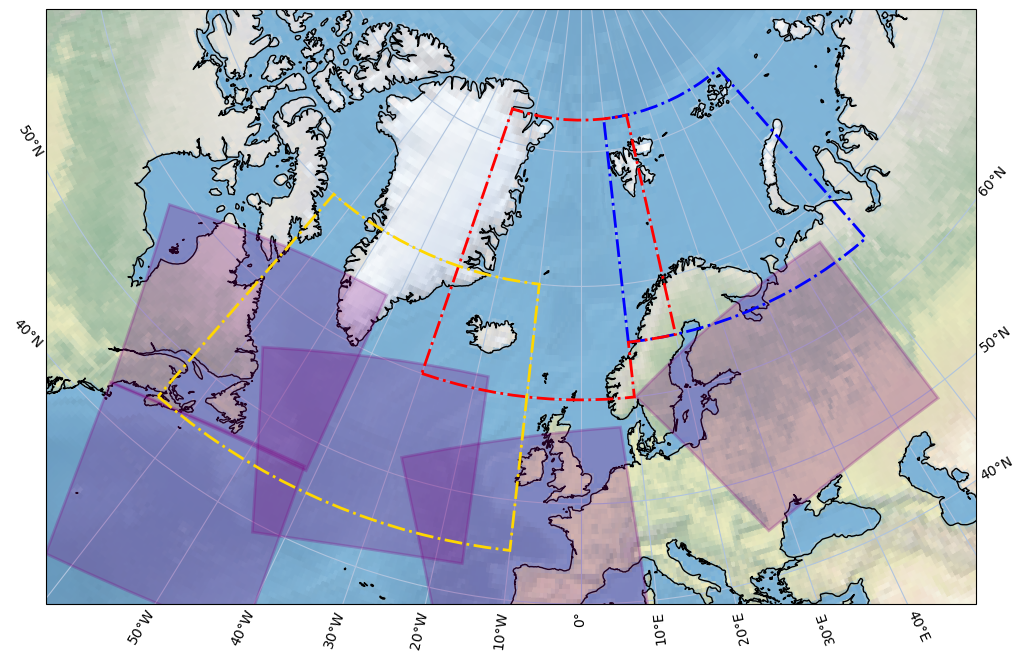

In [32]:
fig = plt.figure(figsize=[12,8])

map_proj = ccrs.LambertConformal(central_longitude=0)
map_proj._threshold /= 100

ax = plt.axes(projection=map_proj)
ax.set_extent([-80,55,40,85], crs=ccrs.PlateCarree())
ax.coastlines(resolution='50m')
ax.stock_img()

gl = ax.gridlines(draw_labels=True, color = 'lightsteelblue',  xlocs = [x for x in range(-60,70,10)], \
                  ylocs = [y for y in range(40,90,10)], x_inline=False, y_inline=False, zorder=1)
gl.top_labels = False

for polygon in polygons:
    polygon = polygon.split()
    polygon = [float(x) for x in polygon]
    polygon = [(polygon[i+1], polygon[i]) for i in range(0, len(polygon), 2)] # need to swap lat/lon

    polygon_patch = patches.Polygon(xy=polygon, edgecolor='purple', facecolor='purple', alpha=0.25,
                                linewidth=2, transform=ccrs.Geodetic(), zorder=2) # ? Projection
    ax.add_patch(polygon_patch)


# Barents Sea subregion
barents_box = patches.Polygon(xy=barents_corners, edgecolor='blue', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=3)
ax.add_patch(barents_box)

# Greenland-Iceland-Norwegian Seas subregion
gin_box = patches.Polygon(xy=gin_corners, edgecolor='red', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=4)
ax.add_patch(gin_box)

# Labrador Sea subregion
labrador_box = patches.Polygon(xy=labrador_corners, edgecolor='gold', fc='none', lw=2, ls='-.', transform=ccrs.PlateCarree(), zorder=5)
ax.add_patch(labrador_box)
